# Import Libraries

In [1]:
import pandas as pd # Reading Dataset

import numpy as np # Operation on Datasets

import matplotlib.pyplot as plt #Visualization Library

import seaborn as sns # Enhanced Visualization Library

from statsmodels.stats.outliers_influence import variance_inflation_factor # Handling Multicollinearity

from sklearn.preprocessing import StandardScaler, LabelEncoder 

from sklearn.linear_model import LogisticRegressionCV

from sklearn.svm import SVC 

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier # Boosting Model Classsification

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.neural_network import MLPClassifier #Neural Networks Classidication

# Load your CSV (Comma Separated Values) dataset

In [33]:
df_creditcard.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [3]:
df_creditcard = pd.read_csv("C:/Users/WebXpert/Boot Camp Data Science wk2/creditcard.csv")

print(df_creditcard.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Initial Data Inspection

In [34]:
#Explore the structure of your data by checking its dimensions, the first few rows, and summary statistics.

#Check data summery

47
print(df_creditcard.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

# Data Cleaning

In [6]:
# Ckeck for missing values

df_creditcard = pd.read_csv("C:/Users/WebXpert/Boot Camp Data Science wk2/creditcard.csv")


# Handle missing values
df_creditcard.dropna(inplace=True)

# Detect and handle outliers
df_creditcard = df_creditcard[(df_creditcard['V1'] >= lower_bound) & (df_creditcard['V30'] <= upper_bound)]




NameError: name 'lower_bound' is not defined

#  Univariate Analysis

In [35]:
# Histogram Visualization For continous Variables

import matplotlib.pyplot as plt

import seaborn as sns


df_creditcard = pd.read_csv("C:/Users/WebXpert/Boot Camp Data Science wk2/creditcard.csv")


num_rows = (num_cols + 2) # Calculate the number of rows needed

plt.figure(figsize=(20, 80))


for i, col in enumerate(df_creditcard, 1):
  if df_creditcard[col].dtype != 'object':
        plt.subplot(num_rows, 3 , i)
        
        plt.hist(df_creditcard[col], bins = 20) # Create a Histogram with a kernel density estimate


# Histogram


plt.title(f' Histogram of  {col}')
plt.show()


NameError: name 'num_cols' is not defined

# Box Plots for Identifying outliers

C:\Users\WebXpert\AppData\Local\Temp\ipykernel_6916\742528453.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\WebXpert\AppData\Local\Temp\ipykernel_6916\742528453.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\WebXpert\AppData\Local\Temp\ipykernel_6916\742528453.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\WebXpert\AppData\Local\Temp\ipykernel_6916\742528453.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\WebXpert\AppData\Local\Temp\ipykernel_6916\742528453.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\WebXpert\AppData\Local\Temp\ipykernel_6916\742528453.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\WebXpert\AppData\Local\Temp\ipykernel_6916\742528453.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Use

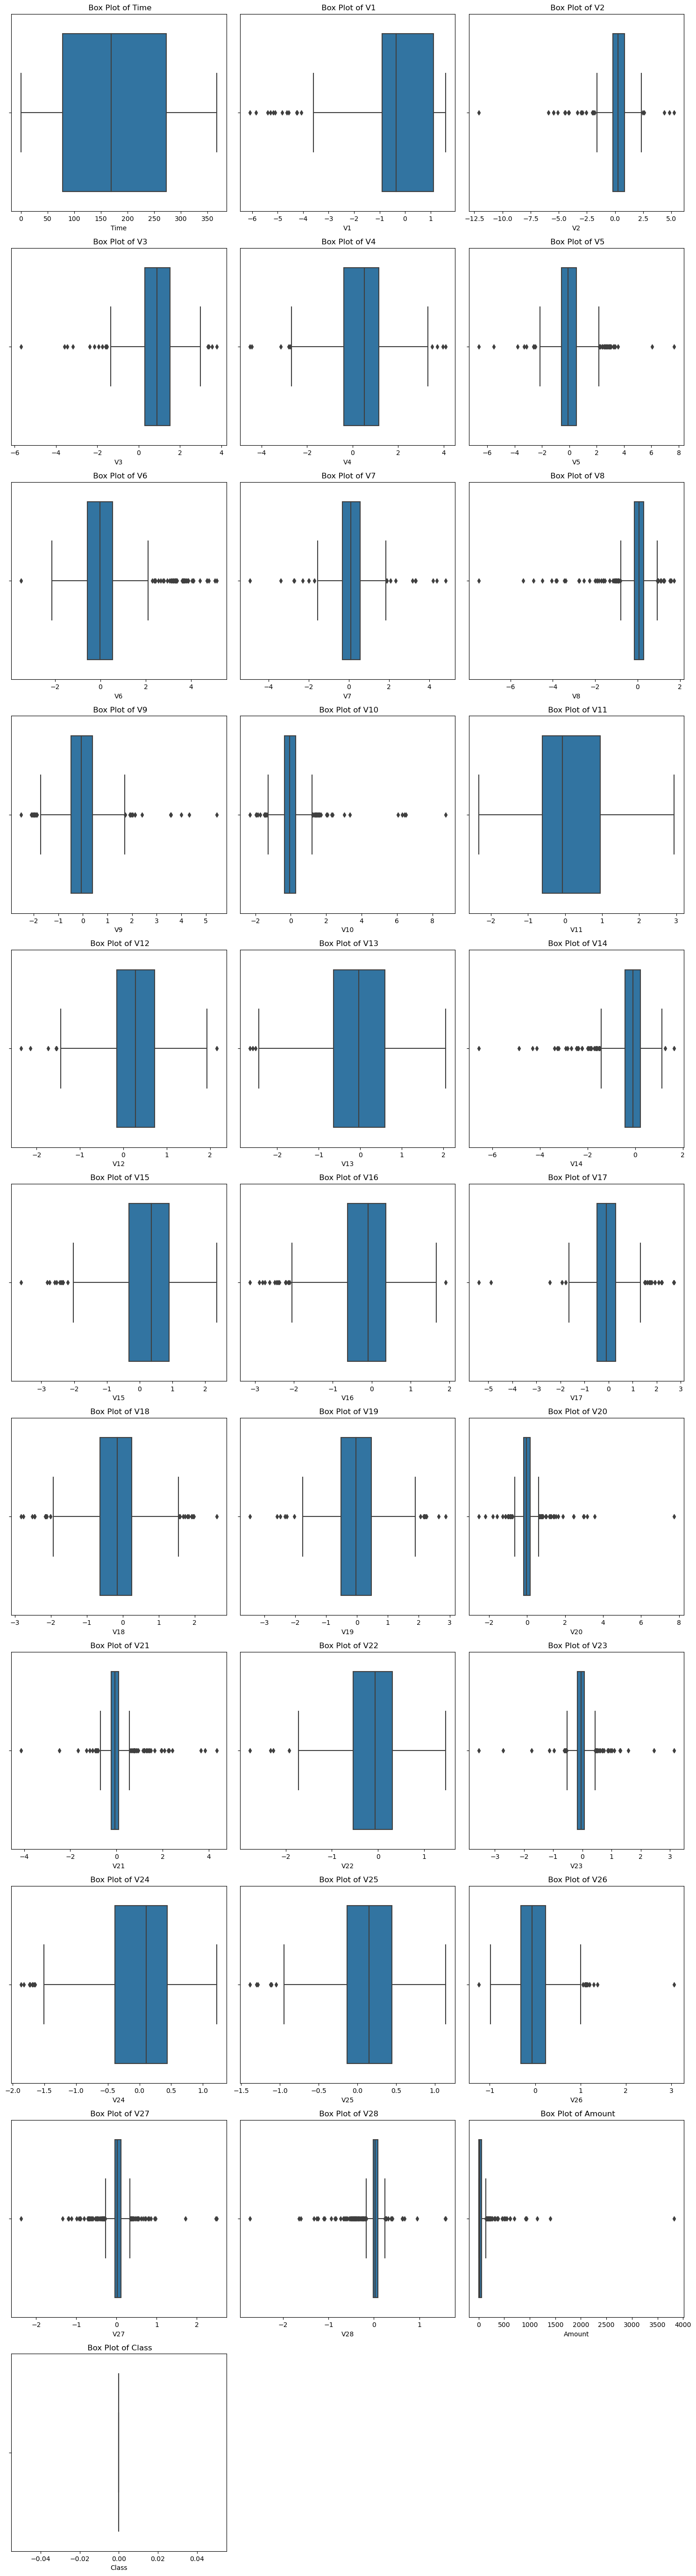

In [44]:
#Box plots for identifying outliers.

# To suppress all warnings
#warnings.filterwarnings('ignore')
# Checking distibution of the various features in the dataset


df_creditcard = pd.read_csv("C:/Users/WebXpert/Boot Camp Data Science wk2/creditcard.csv")


num_cols = df_creditcard.shape[1]
num_rows = (num_cols + 2) # Calculate the number of rows needed

plt.figure(figsize = (15, 5 * num_rows)) # Adjuct the figure size baded on the number of rows 

for i, col in enumerate(df_creditcard, 1):
    
    if df_creditcard[col].dtype != 'object':

        plt.subplot(num_rows, 3, i) # 3 columns per rows

        sns.boxplot(x=df_creditcard[col], orient = 'horizontal')
        plt.title(f' Box Plot of {col}')

       
        


# Investigate relationships between pairs of variables.

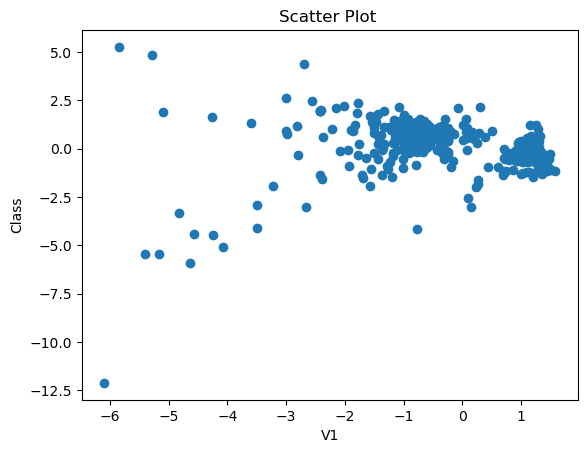

In [36]:
#Scatter plots for continuous variables.
import pandas as pd
import matplotlib.pyplot as plt
df_creditcard = pd.read_csv("C:/Users/WebXpert/Boot Camp Data Science wk2/creditcard.csv")

plt.scatter(df_creditcard['V1'], df_creditcard['V2'])
plt.xlabel('V1')
plt.ylabel('Class')
plt.title('Scatter Plot ')
plt.show()

# Build a Regression Model

# Distribution of Categorical Columns